In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
from textblob import TextBlob 

In [4]:
df=pd.read_csv('netflix_titles.csv')

In [5]:
df.shape

(8807, 12)

In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
x=df.groupby(['rating']).size().reset_index(name='counts')
print(x)

      rating  counts
0     66 min       1
1     74 min       1
2     84 min       1
3          G      41
4      NC-17       3
5         NR      80
6         PG     287
7      PG-13     490
8          R     799
9      TV-14    2160
10      TV-G     220
11     TV-MA    3207
12     TV-PG     863
13      TV-Y     307
14     TV-Y7     334
15  TV-Y7-FV       6
16        UR       3


CREATING THE PIECHART BASED ON CONTENT RATING

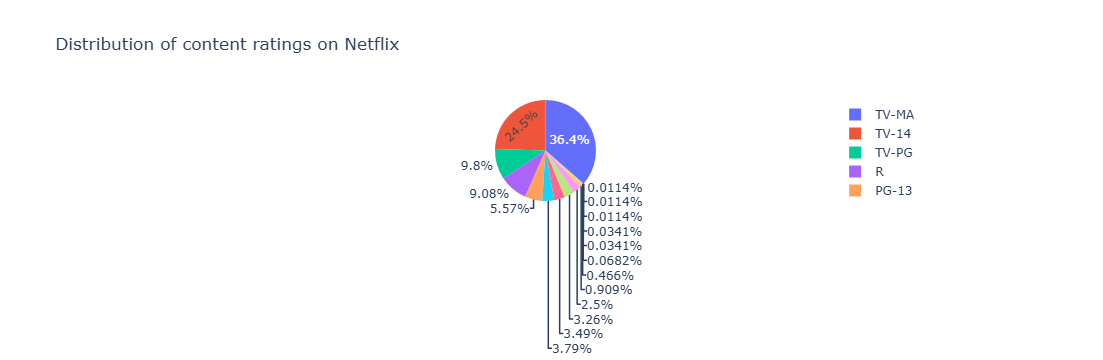

In [12]:
pieChart=px.pie(x,values='counts',names='rating',title='Distribution of content ratings on Netflix')
pieChart.show()

ANALYZING THE TOP 5  DIRECTORS ON NETFLIX

In [13]:
df['director']=df['director'].fillna('director not specified')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,director not specified,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,director not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [14]:
directors_list=pd.DataFrame()
print(directors_list)

Empty DataFrame
Columns: []
Index: []


In [15]:
directors_list=df['director'].str.split(',',expand=True).stack()
print(directors_list)

0     0           Kirsten Johnson
1     0    director not specified
2     0           Julien Leclercq
3     0    director not specified
4     0    director not specified
                    ...          
8802  0             David Fincher
8803  0    director not specified
8804  0           Ruben Fleischer
8805  0              Peter Hewitt
8806  0               Mozez Singh
Length: 9612, dtype: object


In [16]:
directors_list=directors_list.to_frame()
print(directors_list)

                             0
0    0         Kirsten Johnson
1    0  director not specified
2    0         Julien Leclercq
3    0  director not specified
4    0  director not specified
...                        ...
8802 0           David Fincher
8803 0  director not specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


In [17]:
directors_list.columns=['Director']
print(directors_list)

                      Director
0    0         Kirsten Johnson
1    0  director not specified
2    0         Julien Leclercq
3    0  director not specified
4    0  director not specified
...                        ...
8802 0           David Fincher
8803 0  director not specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


In [20]:
directors=directors_list.groupby(['Director']).size().reset_index(name='Total Count')
print(directors)

                       Director  Total Count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5116                Çagan Irmak            1
5117           Ísold Uggadóttir            1
5118        Óskar Thór Axelsson            1
5119           Ömer Faruk Sorak            2
5120               Şenol Sönmez            2

[5121 rows x 2 columns]


In [21]:
directors=directors[directors.Director!='Director not specified']
print(directors)

                       Director  Total Count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5116                Çagan Irmak            1
5117           Ísold Uggadóttir            1
5118        Óskar Thór Axelsson            1
5119           Ömer Faruk Sorak            2
5120               Şenol Sönmez            2

[5121 rows x 2 columns]


In [22]:
directors=directors.sort_values(by=['Total Count'],ascending=False)
print(directors)

                    Director  Total Count
5108  director not specified         2634
4020           Rajiv Chilaka           22
261                Jan Suter           18
4067             Raúl Campos           18
4651             Suhas Kadav           16
...                      ...          ...
2341         J. Lee Thompson            1
2342         J. Michael Long            1
610       Songyos Sugmakanan            1
609           Smriti Keshari            1
2560           Joaquín Mazón            1

[5121 rows x 2 columns]


In [23]:
top5Directors=directors.head()
print(top5Directors)

                    Director  Total Count
5108  director not specified         2634
4020           Rajiv Chilaka           22
261                Jan Suter           18
4067             Raúl Campos           18
4651             Suhas Kadav           16


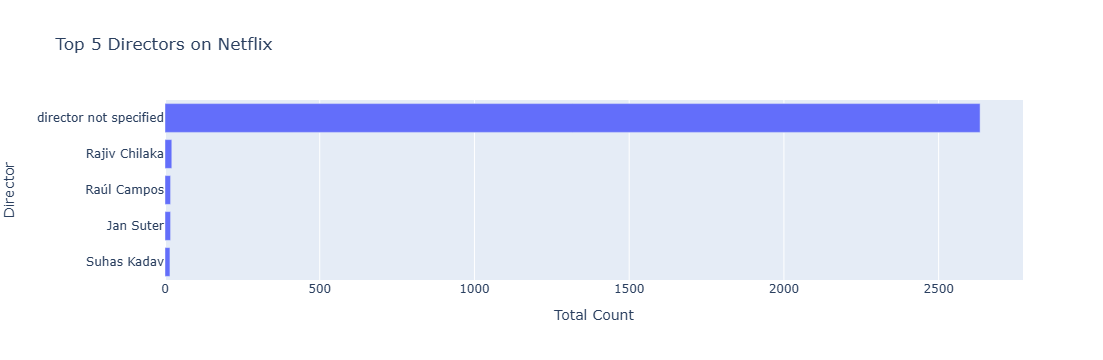

In [24]:
top5Directors=top5Directors.sort_values(by=['Total Count'])
barChart=px.bar(top5Directors,x='Total Count',y='Director',title='Top 5 Directors on Netflix')
barChart.show()

ANALYZING THE TOP 5 ACTORS ON NETFLIX

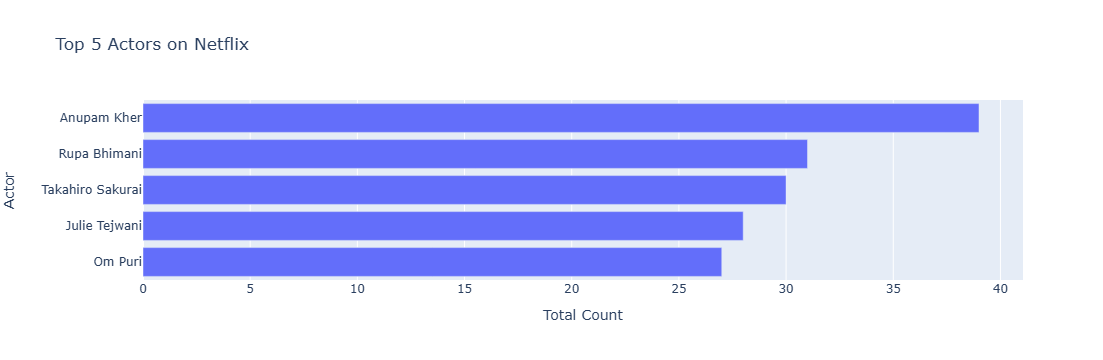

In [26]:
df['cast']=df['cast'].fillna('No cast specified')
cast_df = pd.DataFrame()
cast_df = df['cast'].str.split(',',expand=True).stack()
cast_df = cast_df.to_frame()
cast_df.columns = ['Actor']
actors = cast_df.groupby(['Actor']).size().reset_index(name = 'Total Count')
actors = actors[actors.Actor != 'No cast specified']
actors = actors.sort_values(by=['Total Count'], ascending=False)
top5Actors = actors.head()
top5Actors = top5Actors.sort_values(by=['Total Count'])
barChart2 = px.bar(top5Actors, x='Total Count', y='Actor', title='Top 5 Actors on Netflix')
barChart2.show()

ANALYZING THE CONTEXT PRODUCED ON NETFLIX BASED ON YEARS

In [27]:
df1 = df[['type', 'release_year']]
df1 = df1.rename(columns = {"release_year":"Release Year", "type": "Type"})
df2 = df1.groupby(['Release Year', 'Type']).size().reset_index(name='Total Count')

In [28]:
print(df2)

     Release Year     Type  Total Count
0            1925  TV Show            1
1            1942    Movie            2
2            1943    Movie            3
3            1944    Movie            3
4            1945    Movie            3
..            ...      ...          ...
114          2019  TV Show          397
115          2020    Movie          517
116          2020  TV Show          436
117          2021    Movie          277
118          2021  TV Show          315

[119 rows x 3 columns]


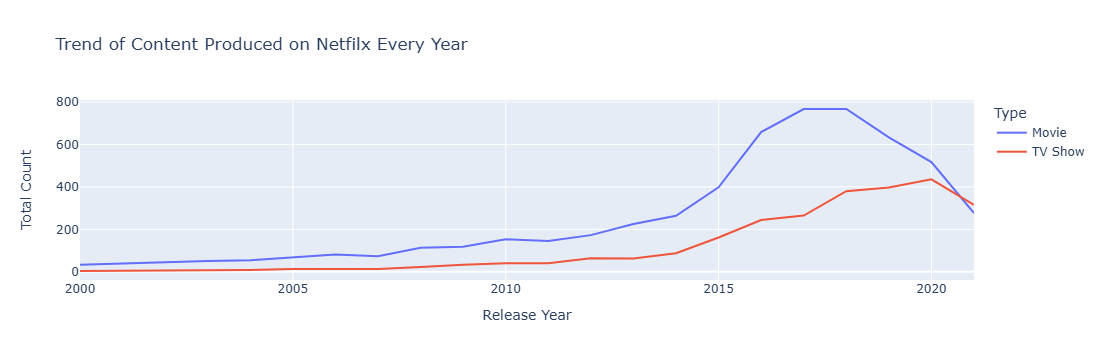

In [29]:
df2 = df2[df2['Release Year']>=2000]
graph = px.line(df2, x = "Release Year", y="Total Count", color = "Type", title = "Trend of Content Produced on Netfilx Every Year")
graph.show()

SENTIMENT ANALYSIS OF NETFLIX CONTENT

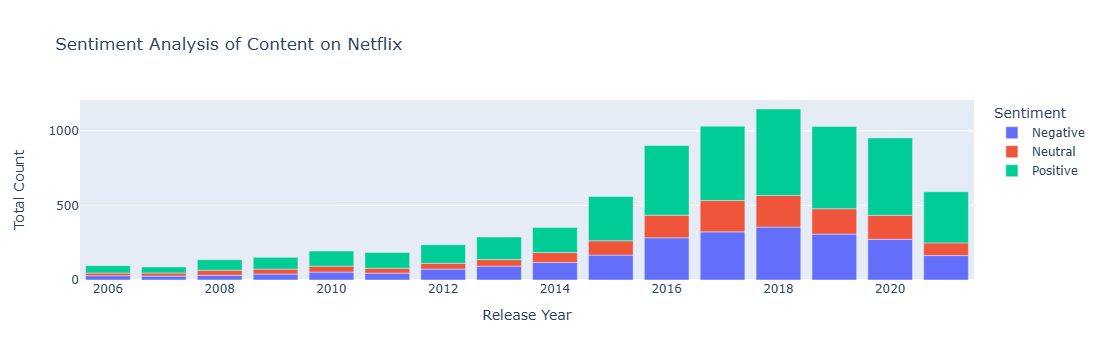

In [30]:
df3 = df[['release_year', 'description']]
df3 = df3.rename(columns = {'release_year':'Release Year', 'description':'Description'})
for index, row in df3.iterrows():
  d=row['Description']
  testimonial = TextBlob(d)
  p = testimonial.sentiment.polarity
  if p==0:
    sent = 'Neutral'
  elif p>0:
    sent = 'Positive'
  else:
    sent = 'Negative'
  df3.loc[[index, 2], 'Sentiment']=sent

df3 = df3.groupby(['Release Year', 'Sentiment']).size().reset_index(name = 'Total Count')

df3 = df3[df3['Release Year']>2005]
barGraph = px.bar(df3, x="Release Year", y="Total Count", color = "Sentiment", title = "Sentiment Analysis of Content on Netflix")
barGraph.show()